## Gestures Recognition with VGGNET - Coco Caffe Model ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import sys
sys.path.append("C:/Users/Mafeus/Desktop/Git_Repos/OpenCV")
import OpCV_Utils

In [3]:
# MPII ref: http://human-pose.mpi-inf.mpg.de/
# Caffe Coco ref: http://cocodataset.org/#keypoints-2018

In [4]:
pose_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose'
images_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/imagens/imagens'
modules_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/modulos/modulos'
videos_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/Videos+prontos'

In [5]:
# MPII config files:
proto_file_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
weights_file_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/pose/pose/body/mpi/pose_iter_160000.caffemodel'

In [6]:
image_test_path = 'C:/Users/Mafeus/Desktop/CURSO reconhecimento gestos/imagens/imagens/body/multiple/multiple_1.jpeg'
image_test = cv2.imread(image_test_path)

In [7]:
image_test.shape

(640, 640, 3)

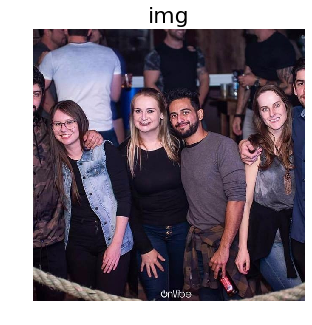

In [9]:
OpCV_Utils.show_single_image_plt((cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)), 'img', (5,5))

In [10]:
# Config Caffe Model:
model = cv2.dnn.readNetFromCaffe(proto_file_path, weights_file_path)

In [11]:
# Transform img to compatible blob format:
blob_input = cv2.dnn.blobFromImage(image = image_test, scalefactor = 1.0/255, size = (368,368), 
                                   mean = (0,0,0), swapRB = False, crop = False)

In [12]:
model.setInput(blob_input)
output = model.forward()

In [13]:
output.shape

(1, 44, 46, 46)

In [14]:
# Get wrist:
point = 4

In [17]:
confidence_map = output[0, point, :, :]
confidence_map = cv2.resize(confidence_map, (640, 640))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


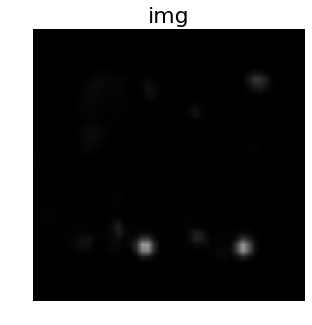

In [18]:
OpCV_Utils.show_single_image_plt((cv2.cvtColor(confidence_map, cv2.COLOR_BGR2RGB)), 'img', (5,5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


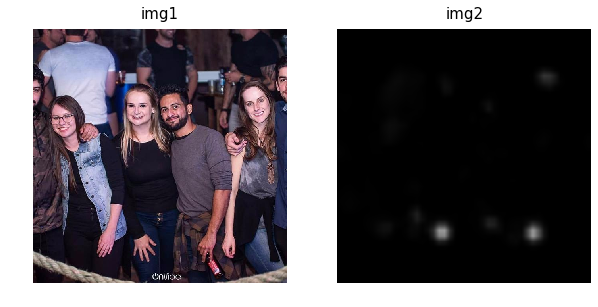

In [24]:
OpCV_Utils.show_multiple_images_plt([[cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB), 
                                      cv2.cvtColor(confidence_map, cv2.COLOR_BGR2RGB)]], 
                                      [['img1', 'img2']], fig_size = (10,10))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


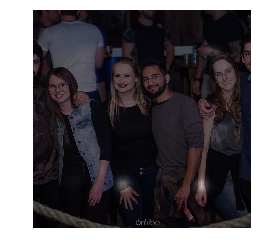

In [27]:
plt.imshow(cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(confidence_map, cv2.COLOR_BGR2RGB), alpha = 0.6)
plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


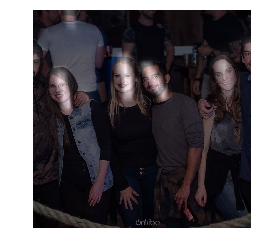

In [29]:
# Get Affinity Map:
point = 17
confidence_map = output[0, point, :, :]
confidence_map = cv2.resize(confidence_map, (640, 640))
plt.imshow(cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(confidence_map, cv2.COLOR_BGR2RGB), alpha = 0.6)
plt.axis('off');